In [145]:
from __future__ import division
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [450]:
data_b1= np.load('/fastio2/dasha/double_pulse/data_BurnSample_RF.npy', mmap_mode='r')
print("All sample (bad wf_width) events {0:.2f}+/-{1:.2f}".format(data_b1.shape[0],np.sqrt(data_b1.shape[0])))
live_time_b1 = 1898429.5199999993

data_b2= np.load('/fastio2/dasha/double_pulse/data_BurnSample_128900_2.npy', mmap_mode='r')
print("Run 128900 events {0:.2f}+/-{1:.2f}".format(data_b2.shape[0],np.sqrt(data_b2.shape[0])))
live_time_b2 = 4995.69

All sample (bad wf_width) events 12899.00+/-113.57
Run 128900 events 45.00+/-6.71


In [451]:
data_c1 = np.load('/fastio2/dasha/double_pulse/data_ALL_CC_CNN_corsika.npy',mmap_mode='r')
print("All sample (bad wf_width) events {0:.2f}+/-{1:.2f}".format(sum(data_c1['weight_val']*live_time_b1),np.sqrt(np.sum(np.square(data_c1['weight_val']*live_time_b1)))))
print("Run128900 events {0:.2f}+/-{1:.2f}".format(sum(data_c1['weight_val']*live_time_b2),np.sqrt(np.sum(np.square(data_c1['weight_val']*live_time_b2)))))

print("No ovesize")
data_c3= np.load('/fastio2/dasha/double_pulse/data_20904_corsika_test.npy', mmap_mode='r')
print("All sample (bad wf_width) events {0:.2f}+/-{1:.2f}".format(sum(data_c3['weight_val']*live_time_b1),np.sqrt(np.sum(np.square(data_c3['weight_val']*live_time_b1)))))
print("Run128900 events {0:.2f}+/-{1:.2f}".format(sum(data_c3['weight_val']*live_time_b2),np.sqrt(np.sum(np.square(data_c3['weight_val']*live_time_b2)))))

secs_per_year = 31536000
data_tc = np.load('/fastio2/dasha/double_pulse/data_CC_NuTau_1_1.npy',mmap_mode='r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_CC_NuTau_2_1.npy',mmap_mode='r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_CC_NuMu_1_1.npy',mmap_mode='r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_CC_NuMu_2_1.npy',mmap_mode='r')
data_ec = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_1_1.npy',mmap_mode='r')
data_en = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_2_1.npy',mmap_mode='r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_3_1.npy',mmap_mode='r')

All sample (bad wf_width) events 10480.22+/-37.22
Run128900 events 27.58+/-0.10
No ovesize
All sample (bad wf_width) events 5621.67+/-80.74
Run128900 events 14.79+/-0.21


In [452]:
data_b1 = data_b1[np.isfinite(data_b1['logan_veto']['SPE_rlogl']) & np.isfinite(data_b1['logan_veto']['Cascade_rlogl'])]
data_b2 = data_b2[np.isfinite(data_b2['logan_veto']['SPE_rlogl']) & np.isfinite(data_b2['logan_veto']['Cascade_rlogl'])]
data_c1 = data_c1[np.isfinite(data_c1['logan_veto']['SPE_rlogl']) & np.isfinite(data_c1['logan_veto']['Cascade_rlogl'])]
data_c3 = data_c3[np.isfinite(data_c3['logan_veto']['SPE_rlogl']) & np.isfinite(data_c3['logan_veto']['Cascade_rlogl'])]
data_tc = data_tc[np.isfinite(data_tc['logan_veto']['SPE_rlogl']) & np.isfinite(data_tc['logan_veto']['Cascade_rlogl'])]
data_tn = data_tn[np.isfinite(data_tn['logan_veto']['SPE_rlogl']) & np.isfinite(data_tn['logan_veto']['Cascade_rlogl'])]
data_mc = data_mc[np.isfinite(data_mc['logan_veto']['SPE_rlogl']) & np.isfinite(data_mc['logan_veto']['Cascade_rlogl'])]
data_mn = data_mn[np.isfinite(data_mn['logan_veto']['SPE_rlogl']) & np.isfinite(data_mn['logan_veto']['Cascade_rlogl'])]
data_ec = data_ec[np.isfinite(data_ec['logan_veto']['SPE_rlogl']) & np.isfinite(data_ec['logan_veto']['Cascade_rlogl'])]
data_en = data_en[np.isfinite(data_en['logan_veto']['SPE_rlogl']) & np.isfinite(data_en['logan_veto']['Cascade_rlogl'])]
data_eg = data_eg[np.isfinite(data_eg['logan_veto']['SPE_rlogl']) & np.isfinite(data_eg['logan_veto']['Cascade_rlogl'])]

In [453]:
LLH = -0.1
data_tc = data_tc[data_tc['logan_veto']['SPE_rlogl']-data_tc['logan_veto']['Cascade_rlogl'] > LLH]
data_tn = data_tn[data_tn['logan_veto']['SPE_rlogl']-data_tn['logan_veto']['Cascade_rlogl'] > LLH] 
data_mc = data_mc[data_mc['logan_veto']['SPE_rlogl']-data_mc['logan_veto']['Cascade_rlogl'] > LLH]
data_mn = data_mn[data_mn['logan_veto']['SPE_rlogl']-data_mn['logan_veto']['Cascade_rlogl'] > LLH] 
data_ec = data_ec[data_ec['logan_veto']['SPE_rlogl']-data_ec['logan_veto']['Cascade_rlogl'] > LLH]
data_en = data_en[data_en['logan_veto']['SPE_rlogl']-data_en['logan_veto']['Cascade_rlogl'] > LLH] 
data_eg = data_eg[data_eg['logan_veto']['SPE_rlogl']-data_eg['logan_veto']['Cascade_rlogl'] > LLH] 

In [459]:
array_tc = np.array([data_tc['qtot'],data_tc['logan_veto']['SPE_rlogl']-data_tc['logan_veto']['Cascade_rlogl'],data_tc['qst']['q'][:,0],\
                     data_tc['qst']['q'][:,1],data_tc['qst']['q'][:,2],data_tc['preds']['n1'],data_tc['preds']['n2_1'],\
                     data_tc['preds']['n3'],data_tc['weight_val']]).T 
array_tn = np.array([data_tn['qtot'],data_tn['logan_veto']['SPE_rlogl']-data_tn['logan_veto']['Cascade_rlogl'],data_tn['qst']['q'][:,0],\
                     data_tn['qst']['q'][:,1],data_tn['qst']['q'][:,2],data_tn['preds']['n1'],data_tn['preds']['n2_1'],\
                     data_tn['preds']['n3'],data_tn['weight_val']]).T 
array_mc = np.array([data_mc['qtot'],data_mc['logan_veto']['SPE_rlogl']-data_mc['logan_veto']['Cascade_rlogl'],data_mc['qst']['q'][:,0],\
                     data_mc['qst']['q'][:,1],data_mc['qst']['q'][:,2],data_mc['preds']['n1'],data_mc['preds']['n2_1'],\
                     data_mc['preds']['n3'],data_mc['weight_val']]).T 
array_mn = np.array([data_mn['qtot'],data_mn['logan_veto']['SPE_rlogl']-data_mn['logan_veto']['Cascade_rlogl'],data_mn['qst']['q'][:,0],\
                     data_mn['qst']['q'][:,1],data_mn['qst']['q'][:,2],data_mn['preds']['n1'],data_mn['preds']['n2_1'],\
                     data_mn['preds']['n3'],data_mn['weight_val']]).T 
array_ec = np.array([data_ec['qtot'],data_ec['logan_veto']['SPE_rlogl']-data_ec['logan_veto']['Cascade_rlogl'],data_ec['qst']['q'][:,0],\
                     data_ec['qst']['q'][:,1],data_ec['qst']['q'][:,2],data_ec['preds']['n1'],data_ec['preds']['n2_1'],\
                     data_ec['preds']['n3'],data_ec['weight_val']]).T 
array_en = np.array([data_en['qtot'],data_en['logan_veto']['SPE_rlogl']-data_en['logan_veto']['Cascade_rlogl'],data_en['qst']['q'][:,0],\
                     data_en['qst']['q'][:,1],data_en['qst']['q'][:,2],data_en['preds']['n1'],data_en['preds']['n2_1'],\
                     data_en['preds']['n3'],data_en['weight_val']]).T 
array_eg = np.array([data_eg['qtot'],data_eg['logan_veto']['SPE_rlogl']-data_eg['logan_veto']['Cascade_rlogl'],data_eg['qst']['q'][:,0],\
                     data_eg['qst']['q'][:,1],data_eg['qst']['q'][:,2],data_eg['preds']['n1'],data_eg['preds']['n2_1'],\
                     data_eg['preds']['n3'],data_eg['weight_val']]).T 
array_c = np.array([data_c3['qtot'],data_c3['logan_veto']['SPE_rlogl']-data_c3['logan_veto']['Cascade_rlogl'],data_c3['qst']['q'][:,0],\
                    data_c3['qst']['q'][:,1],data_c3['qst']['q'][:,2],data_c3['preds']['n1'],data_c3['preds']['n2_1'],\
                    data_c3['preds']['n3'],data_c3['weight_val']]).T 

array_sim =  array_tc
array_sim  =  np.append(array_sim ,array_tn, axis = 0)
array_sim  =  np.append(array_sim ,array_mc, axis = 0)
array_sim  =  np.append(array_sim ,array_mn, axis = 0)
array_sim  =  np.append(array_sim ,array_ec, axis = 0)
array_sim  =  np.append(array_sim ,array_en, axis = 0)
array_sim  =  np.append(array_sim ,array_eg, axis = 0)
array_sim  =  np.append(array_sim ,array_c, axis = 0)

array_bs = np.array([data_b1['qtot'],data_b1['logan_veto']['SPE_rlogl']-data_b1['logan_veto']['Cascade_rlogl'],data_b1['qst']['q'][:,0],\
                    data_b1['qst']['q'][:,1],data_b1['qst']['q'][:,2],data_b1['preds']['n1'],data_b1['preds']['n2_1'],\
                    data_b1['preds']['n3']]).T 

#array_c = np.array([data_c_label,data_c['preds']['n3'],data_c['preds']['n1'],data_c['weight_val']*secs_per_year*years]).T 


In [456]:
print(array_sim.shape, array_tc.shape, array_bs.shape)
print(sum(array_sim[:,-1]))

(781049, 9) (107627, 9) (12897, 8)
0.002961221043377948


In [457]:
NET1 = 0.99
NET3 = 0.8
masks_b = (data_b1['preds']['n3'] >= NET3) & (data_b1['preds']['n1'] >= NET1) 
masks_c = (data_c3['preds']['n3'] >= NET3) & (data_c3['preds']['n1'] >= NET1)
masks_tc = (data_tc['preds']['n1'] >= NET1) & (data_tc['preds']['n3'] >= NET3) 
masks_tn = (data_tn['preds']['n1'] >= NET1) & (data_tn['preds']['n3'] >= NET3) 
masks_mc = (data_mc['preds']['n1'] >= NET1) & (data_mc['preds']['n3'] >= NET3) 
masks_mn = (data_mn['preds']['n1'] >= NET1) & (data_mn['preds']['n3'] >= NET3) 
masks_ec = (data_ec['preds']['n1'] >= NET1) & (data_ec['preds']['n3'] >= NET3) 
masks_en = (data_en['preds']['n1'] >= NET1) & (data_en['preds']['n3'] >= NET3) 
masks_eg = (data_eg['preds']['n1'] >= NET1) & (data_eg['preds']['n3'] >= NET3) 

In [460]:
print("Score Cuts")
print("BS")
print("BS events {0:.2f}+/-{1:.2f}".format(data_b1[masks_b].shape[0],np.sqrt(data_b1[masks_b].shape[0])))
print("Corsika")
print("Corsika events {0:.2f}+/-{1:.2f}".format(sum(data_c3['weight_val'][masks_c]*live_time_b1),np.sqrt(np.sum(np.square(data_c3['weight_val'][masks_c]*live_time_b1)))))
print("Nu")
print("NuTauCC events {0:.2f}+/-{1:.2f}".format(sum(data_tc['weight_val'][masks_tc]*live_time_b1),np.sqrt(np.sum(np.square(data_tc['weight_val'][masks_tc]*live_time_b1)))))
print("NuTauNC events {0:.2f}+/-{1:.2f}".format(sum(data_tn['weight_val'][masks_tn]*live_time_b1),np.sqrt(np.sum(np.square(data_tn['weight_val'][masks_tn]*live_time_b1)))))
print("NuMuCC events {0:.2f}+/-{1:.2f}".format(sum(data_mc['weight_val'][masks_mc]*live_time_b1),np.sqrt(np.sum(np.square(data_mc['weight_val'][masks_mc]*live_time_b1)))))
print("NuMuNC events {0:.2f}+/-{1:.2f}".format(sum(data_mn['weight_val'][masks_mn]*live_time_b1),np.sqrt(np.sum(np.square(data_mn['weight_val'][masks_mn]*live_time_b1)))))
print("NuECC events {0:.2f}+/-{1:.2f}".format(sum(data_ec['weight_val'][masks_ec]*live_time_b1),np.sqrt(np.sum(np.square(data_ec['weight_val'][masks_ec]*live_time_b1)))))
print("NuENC events {0:.2f}+/-{1:.2f}".format(sum(data_en['weight_val'][masks_en]*live_time_b1),np.sqrt(np.sum(np.square(data_en['weight_val'][masks_en]*live_time_b1)))))
print("NuEGC events {0:.2f}+/-{1:.2f}".format(sum(data_eg['weight_val'][masks_eg]*live_time_b1),np.sqrt(np.sum(np.square(data_eg['weight_val'][masks_eg]*live_time_b1)))))



Score Cuts
BS
BS events 6.00+/-2.45
Corsika
Corsika events 1.67+/-1.06
Nu
NuTauCC events 0.05+/-0.00
NuTauNC events 0.00+/-0.00
NuMuCC events 0.00+/-0.00
NuMuNC events 0.00+/-0.00
NuECC events 0.00+/-0.00
NuENC events 0.00+/-0.00
NuEGC events 0.00+/-0.00


In [461]:
def Plot(data1,data2,weights2,mask1,mask2,livetime,name,label,bins,scale, loc =1, use_mask= False):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    gs = gridspec.GridSpec(2,1, height_ratios=[3.5,2], wspace=0.04, hspace=0.04)
    ax = fig.add_subplot(gs[0])
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 16)
    #ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    #ax.set_ylim(10**(-5),1.5*10**(4))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16) 
    if use_mask:
        n_bs, bins_bs, patches_bs = ax.hist(data1[mask1], histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_c, bins_c, patches_c = ax.hist(data2[mask2], weights = weights2[mask2]*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "Corsika")  
        n2_c, bins_n2c = np.histogram(data2[mask2], bins =bins_c, weights = (weights2[mask2]*livetime)**2)
    
    else:
        n_bs, bins_bs, patches_bs = ax.hist(data1, histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_c, bins_c, patches_c = ax.hist(data2, weights = weights2*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "Corsika")  
        n2_c, bins_n2c = np.histogram(data2, bins =bins_c, weights = (weights2*livetime)**2)

    bin_centers = 0.5*(bins_bs[1:] + bins_bs[:-1])
    plt.errorbar(bin_centers, n_bs, yerr = np.sqrt(n_bs), lw =1, capsize = 2,fmt='.k')
    plt.errorbar(bin_centers, n_c, yerr = np.sqrt(n2_c), lw =1, capsize = 2,fmt='.b')
    plt.legend(loc=loc)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        ns = np.nan_to_num(n_bs/n_c)
        err = ns*np.sqrt(np.nan_to_num(1/n_c) + np.sqrt(np.nan_to_num(n2_c/(n_bs)**2)))
    
    ax = fig.add_subplot(gs[1])
    ax.set_xscale(scale)
    ax.set_yscale('log')
    #ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
    ax.set_ylim(10**(-1),10**(1))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("Ratio", fontsize = 16) 
    ax.axhline(y =1, ls = '--')
    plt.bar(bins_bs[:-1],ns,np.diff(bins_bs), yerr = err, capsize = 2, fill =False)
    #plt.errorbar(, ns, yerr = err, lw =1, capsize = 2,fmt='.k')
    


def Plot3(data1,data2,data3,weights2,weights3,mask1,mask2,mask3,livetime,name,label,bins,scale, loc = 1, use_mask= False):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    gs = gridspec.GridSpec(2,1, height_ratios=[3.5,2], wspace=0.04, hspace=0.04)
    ax = fig.add_subplot(gs[0])
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 16)
    #ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-5),10**(4))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16) 
    if use_mask:
        n_bs, bins_bs, patches_bs = ax.hist(data1[mask1], histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_c, bins_c, patches_c = ax.hist(data2[mask2], weights = weights2[mask2]*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        n2_c, bins_n2c = np.histogram(data2[mask2], bins =bins_c, weights = (weights2[mask2]*livetime)**2)
        n_t, bins_t, patches_c = ax.hist(data3[mask3], weights = weights3[mask3]*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        n2_t, bins_n2t = np.histogram(data3[mask3], bins =bins_t, weights = (weights3[mask3]*livetime)**2)

    else:
        n_bs, bins_bs, patches_bs = ax.hist(data1, histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_c, bins_c, patches_c = ax.hist(data2, weights = weights2*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        n2_c, bins_n2c = np.histogram(data2, bins =bins_c, weights = (weights2*livetime)**2)
        n_t, bins_t, patches_c = ax.hist(data3, weights = weights3*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        n2_t, bins_n2t = np.histogram(data3, bins =bins_t, weights = (weights3*livetime)**2)

    bin_centers = 0.5*(bins_bs[1:] + bins_bs[:-1])
    plt.errorbar(bin_centers, n_bs, yerr = np.sqrt(n_bs), lw =1, capsize = 2,fmt='.k')
    plt.errorbar(bin_centers, n_c, yerr = np.sqrt(n2_c), lw =1, capsize = 2,fmt='.b')
    plt.errorbar(bin_centers, n_t, yerr = np.sqrt(n2_t), lw =1, capsize = 2,fmt='.r')
    plt.legend(loc=loc)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        ns = np.nan_to_num(n_bs/n_c)
        err = ns*np.sqrt(np.nan_to_num(1/n_c) + np.sqrt(np.nan_to_num(n2_c/(n_bs)**2)))
    
    ax = fig.add_subplot(gs[1])
    ax.set_xscale(scale)
    ax.set_yscale('log')
    #ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
    ax.set_ylim(10**(-1),10**(1))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("Ratio", fontsize = 16) 
    ax.axhline(y =1, ls = '--')
    plt.bar(bins_bs[:-1],ns,np.diff(bins_bs), yerr = err, capsize = 2, fill =False)
    #plt.errorbar(, ns, yerr = err, lw =1, capsize = 2,fmt='.k')
    
def Plot3l(data1,data2,data3,weights2,weights3,mask1,mask2,mask3,livetime,name,label,bins,scale,lp =0.99, loc = 1, use_mask= False):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    gs = gridspec.GridSpec(2,1, height_ratios=[3.5,2], wspace=0.04, hspace=0.04)
    ax = fig.add_subplot(gs[0])
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 16)
    #ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-5),10**(4))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16) 
    if use_mask:
        n_bs, bins_bs, patches_bs = ax.hist(data1[mask1], histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_c, bins_c, patches_c = ax.hist(data2[mask2], weights = weights2[mask2]*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        n2_c, bins_n2c = np.histogram(data2[mask2], bins =bins_c, weights = (weights2[mask2]*livetime)**2)
        n_t, bins_t, patches_c = ax.hist(data3[mask3], weights = weights3[mask3]*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        n2_t, bins_n2t = np.histogram(data3[mask3], bins =bins_t, weights = (weights3[mask3]*livetime)**2)
        
    else:
        n_bs, bins_bs, patches_bs = ax.hist(data1, histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_c, bins_c, patches_c = ax.hist(data2, weights = weights2*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        n2_c, bins_n2c = np.histogram(data2, bins =bins_c, weights = (weights2*livetime)**2)
        n_t, bins_t, patches_c = ax.hist(data3, weights = weights3*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        n2_t, bins_n2t = np.histogram(data3, bins =bins_t, weights = (weights3*livetime)**2)
    ax.axvline(x=lp,c='g',lw =2,ls = '--')
    bin_centers = 0.5*(bins_bs[1:] + bins_bs[:-1])
    plt.errorbar(bin_centers, n_bs, yerr = np.sqrt(n_bs), lw =1, capsize = 2,fmt='.k')
    plt.errorbar(bin_centers, n_c, yerr = np.sqrt(n2_c), lw =1, capsize = 2,fmt='.b')
    plt.errorbar(bin_centers, n_t, yerr = np.sqrt(n2_t), lw =1, capsize = 2,fmt='.r')
    plt.legend(loc=loc)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        ns = np.nan_to_num(n_bs/n_c)
        err = ns*np.sqrt(np.nan_to_num(1/n_c) + np.sqrt(np.nan_to_num(n2_c/(n_bs)**2)))
    
    ax = fig.add_subplot(gs[1])
    ax.set_xscale(scale)
    ax.set_yscale('log')
    #ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
    ax.set_ylim(10**(-1),10**(1))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("Ratio", fontsize = 16) 
    ax.axhline(y =1, ls = '--')
    ax.axvline(x=lp,c='g',lw =2,ls = '--')
    plt.bar(bins_bs[:-1],ns,np.diff(bins_bs), yerr = err, capsize = 2, fill =False)
    #plt.errorbar(, ns, yerr = err, lw =1, capsize = 2,fmt='.k')
    

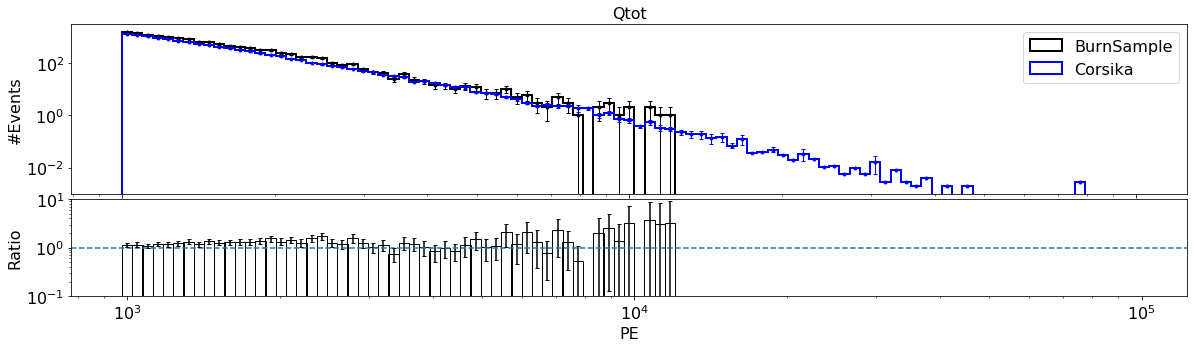

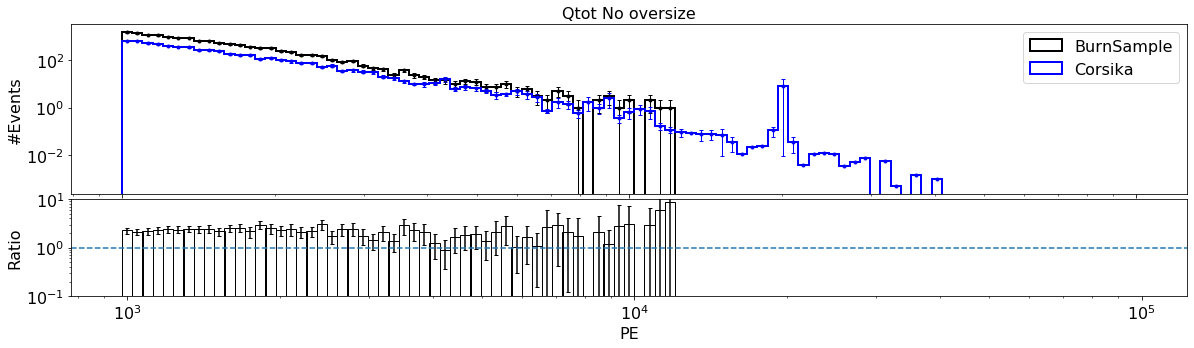

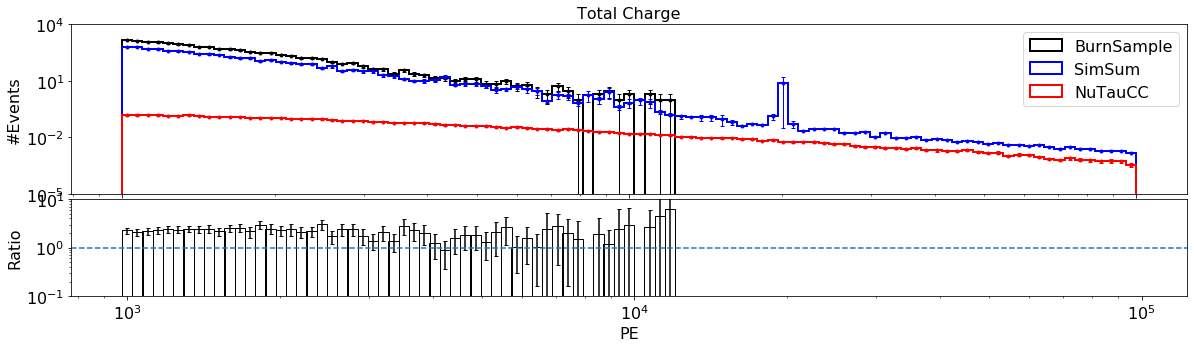

In [462]:
Plot(data_b1['qtot'],data_c1['qtot'],data_c1['weight_val'],masks_b1,masks_c1,live_time_b1,"Qtot","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log')
Plot(data_b1['qtot'],data_c3['qtot'],data_c3['weight_val'],masks_b1,masks_c1,live_time_b1,"Qtot No oversize","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log')
Plot3(array_bs[:,0],array_sim[:,0],array_tc[:,0],array_sim[:,-1],array_tc[:,-1],masks_b1,masks_c1,masks_tc,live_time_b1,"Total Charge","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log')

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in multiply


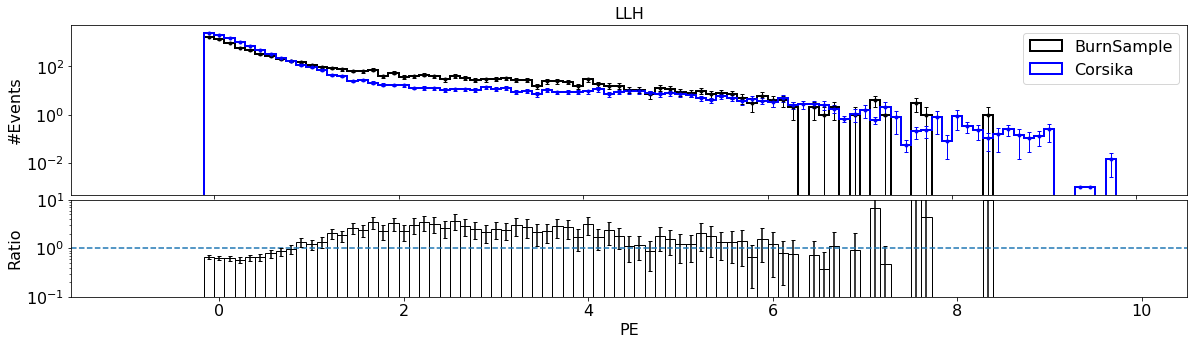

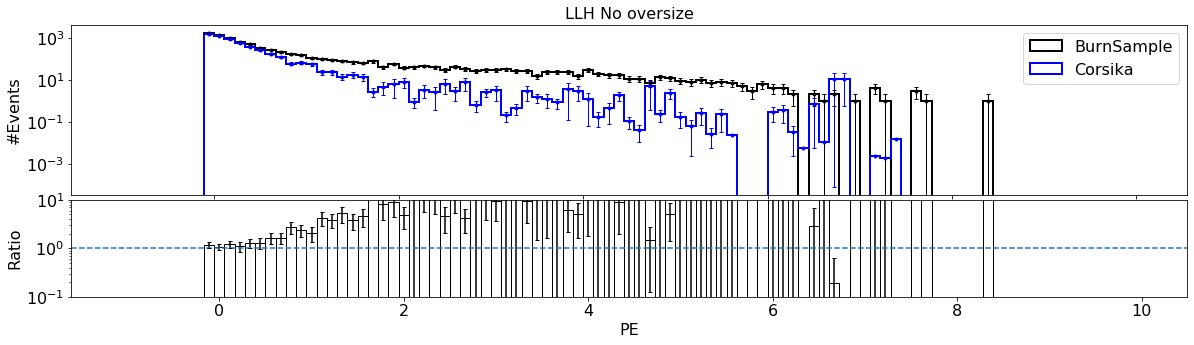

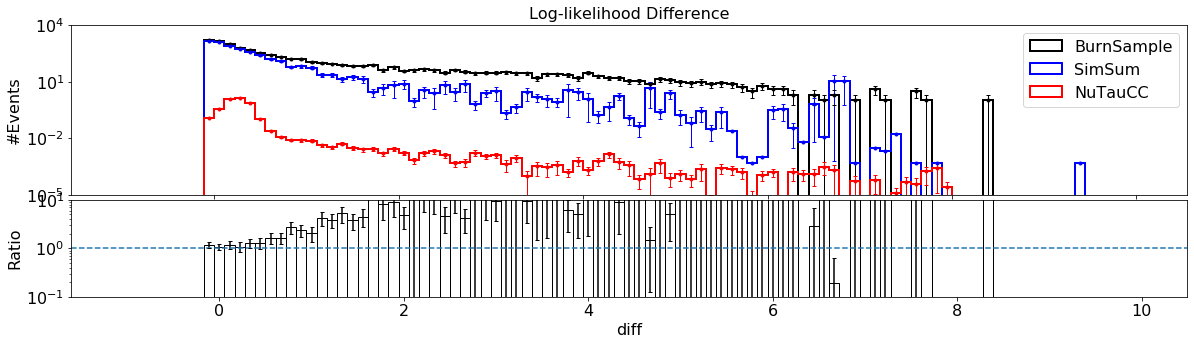

In [463]:
Plot(data_b1['logan_veto']['SPE_rlogl']-data_b1['logan_veto']['Cascade_rlogl'],data_c1['logan_veto']['SPE_rlogl']-data_c1['logan_veto']['Cascade_rlogl'],data_c1['weight_val'],masks_b1,masks_c1,live_time_b1,"LLH","PE",bins=np.linspace(-1,10,100),scale = 'linear')
Plot(data_b1['logan_veto']['SPE_rlogl']-data_b1['logan_veto']['Cascade_rlogl'],data_c3['logan_veto']['SPE_rlogl']-data_c3['logan_veto']['Cascade_rlogl'],data_c3['weight_val'],masks_b1,masks_c1,live_time_b1,"LLH No oversize","PE",bins=np.linspace(-1,10,100),scale = 'linear')
Plot3(array_bs[:,1],array_sim[:,1],array_tc[:,1],array_sim[:,-1],array_tc[:,-1],masks_b1,masks_c1,masks_tc,live_time_b1,"Log-likelihood Difference","diff",bins=np.linspace(-1,10,100),loc = 1, scale = 'linear')

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in multiply


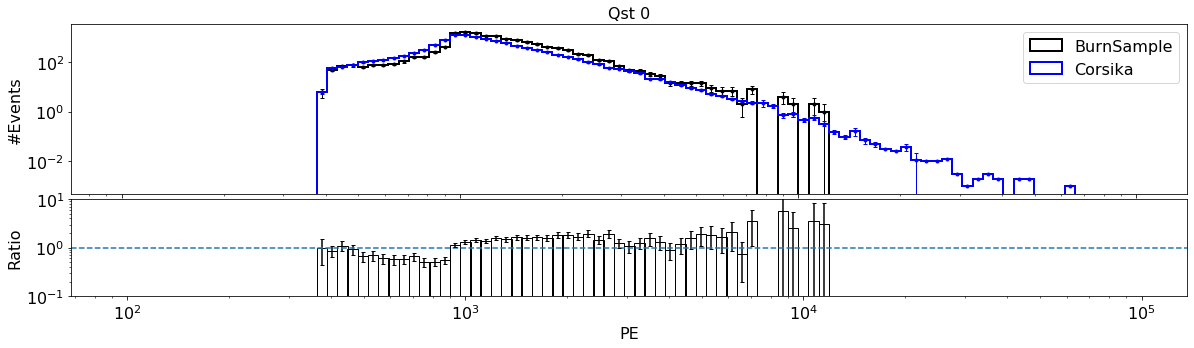

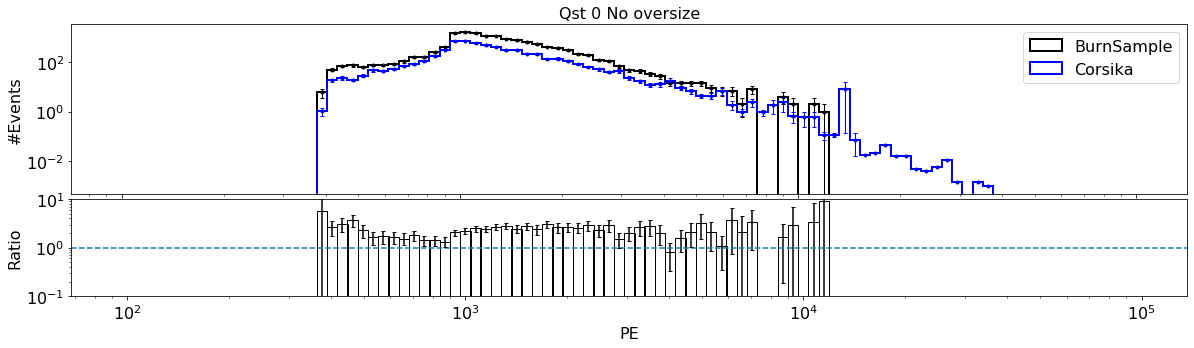

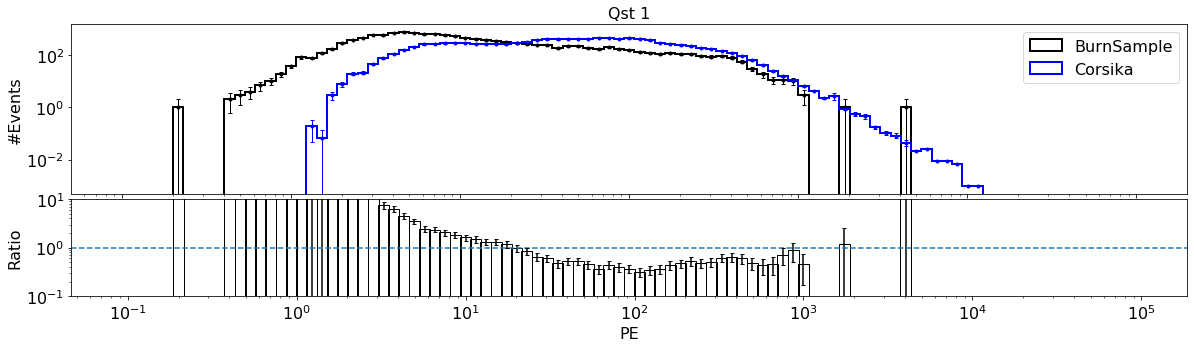

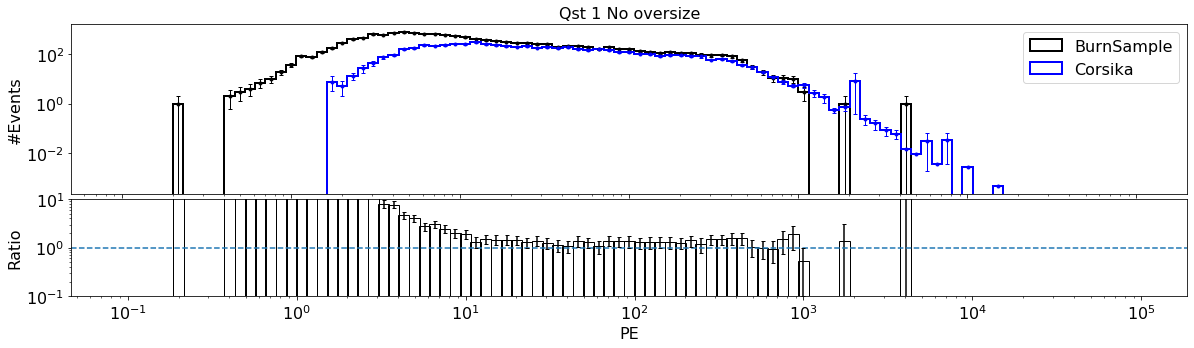

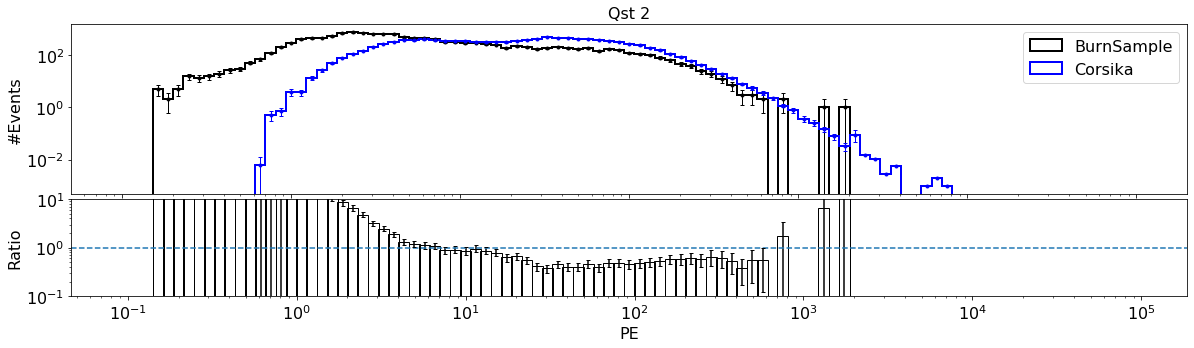

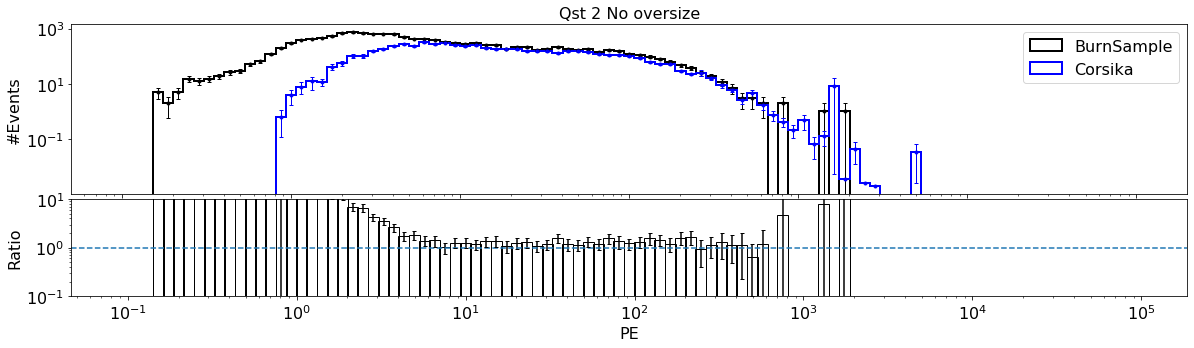

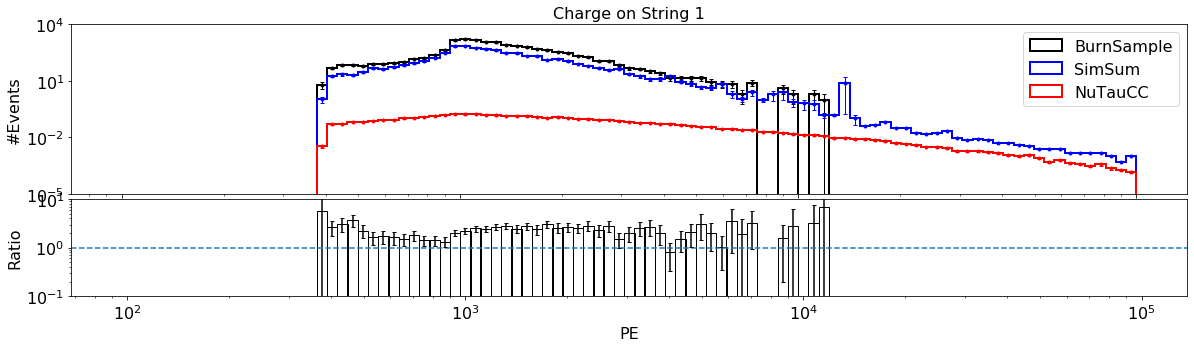

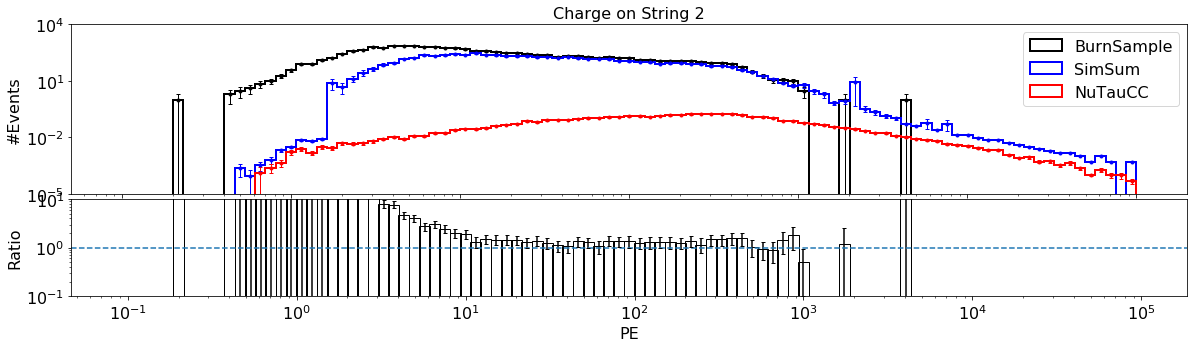

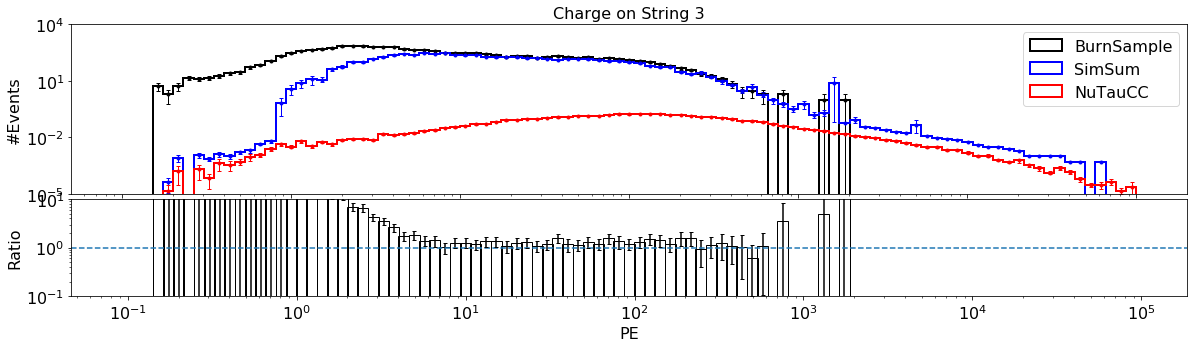

In [464]:
Plot(data_b1['qst']['q'][:,0],data_c1['qst']['q'][:,0],data_c1['weight_val'],masks_b1,masks_c1,live_time_b1,"Qst 0","PE",bins=np.logspace(np.log10(100),np.log10(100000),100),scale = 'log')
Plot(data_b1['qst']['q'][:,0],data_c3['qst']['q'][:,0],data_c3['weight_val'],masks_b1,masks_c1,live_time_b1,"Qst 0 No oversize","PE",bins=np.logspace(np.log10(100),np.log10(100000),100),scale = 'log')
Plot(data_b1['qst']['q'][:,1],data_c1['qst']['q'][:,1],data_c1['weight_val'],masks_b1,masks_c1,live_time_b1,"Qst 1","PE",bins=np.logspace(np.log10(0.1),np.log10(100000),100),scale = 'log')
Plot(data_b1['qst']['q'][:,1],data_c3['qst']['q'][:,1],data_c3['weight_val'],masks_b1,masks_c1,live_time_b1,"Qst 1 No oversize","PE",bins=np.logspace(np.log10(0.1),np.log10(100000),100),scale = 'log')
Plot(data_b1['qst']['q'][:,2],data_c1['qst']['q'][:,2],data_c1['weight_val'],masks_b1,masks_c1,live_time_b1,"Qst 2","PE",bins=np.logspace(np.log10(0.1),np.log10(100000),100),scale = 'log')
Plot(data_b1['qst']['q'][:,2],data_c3['qst']['q'][:,2],data_c3['weight_val'],masks_b1,masks_c1,live_time_b1,"Qst 2 No oversize","PE",bins=np.logspace(np.log10(0.1),np.log10(100000),100),scale = 'log')
Plot3(array_bs[:,2],array_sim[:,2],array_tc[:,2],array_sim[:,-1],array_tc[:,-1],masks_b1,masks_c1,masks_tc,live_time_b1,"Charge on String 1","PE",bins=np.logspace(np.log10(100),np.log10(100000),100),scale = 'log')
Plot3(array_bs[:,3],array_sim[:,3],array_tc[:,3],array_sim[:,-1],array_tc[:,-1],masks_b1,masks_c1,masks_tc,live_time_b1,"Charge on String 2","PE",bins=np.logspace(np.log10(0.1),np.log10(100000),100),scale = 'log')
Plot3(array_bs[:,4],array_sim[:,4],array_tc[:,4],array_sim[:,-1],array_tc[:,-1],masks_b1,masks_c1,masks_tc,live_time_b1,"Charge on String 3","PE",bins=np.logspace(np.log10(0.1),np.log10(100000),100),scale = 'log')

In [465]:
Qst0 = 1000
Qst1 = 10
Qst2 = 10
maskq_b1 = (data_b1['qst']['q'][:,1] >=Qst2) & (data_b1['qst']['q'][:,2] >=Qst1) & (data_b1['qst']['q'][:,0] >=Qst0)
maskq_b2 = (data_b2['qst']['q'][:,1] >=Qst2) & (data_b2['qst']['q'][:,2] >=Qst1) & (data_b2['qst']['q'][:,0] >=Qst0)
maskq_c1 = (data_c1['qst']['q'][:,1] >=Qst2) & (data_c1['qst']['q'][:,2] >=Qst1) & (data_c1['qst']['q'][:,0] >=Qst0)
maskq_c3 = (data_c3['qst']['q'][:,1] >=Qst2) & (data_c3['qst']['q'][:,2] >=Qst1) & (data_c3['qst']['q'][:,0] >=Qst0)
maskq_tc = (data_tc['qst']['q'][:,0] >= Qst0) & (data_tc['qst']['q'][:,1] >= Qst1) & (data_tc['qst']['q'][:,2] >= Qst2)
maskq_tn = (data_tn['qst']['q'][:,0] >= Qst0) & (data_tn['qst']['q'][:,1] >= Qst1) & (data_tn['qst']['q'][:,2] >= Qst2)
maskq_mc = (data_mc['qst']['q'][:,0] >= Qst0) & (data_mc['qst']['q'][:,1] >= Qst1) & (data_mc['qst']['q'][:,2] >= Qst2)
maskq_mn = (data_mn['qst']['q'][:,0] >= Qst0) & (data_mn['qst']['q'][:,1] >= Qst1) & (data_mn['qst']['q'][:,2] >= Qst2) 
maskq_ec = (data_ec['qst']['q'][:,0] >= Qst0) & (data_ec['qst']['q'][:,1] >= Qst1) & (data_ec['qst']['q'][:,2] >= Qst2)
maskq_en = (data_en['qst']['q'][:,0] >= Qst0) & (data_en['qst']['q'][:,1] >= Qst1) & (data_en['qst']['q'][:,2] >= Qst2)
maskq_eg = (data_eg['qst']['q'][:,0] >= Qst0) & (data_eg['qst']['q'][:,1] >= Qst1) & (data_eg['qst']['q'][:,2] >= Qst2) 

maskq_bs = (array_bs[:,2] >=Qst0) & (array_bs[:,3] >=Qst1) & (array_bs[:,4] >=Qst2)
maskq_sim = (array_sim[:,2] >=Qst0) & (array_sim[:,3] >=Qst1) & (array_sim[:,4] >=Qst2)
maskq_stc = (array_tc[:,2] >=Qst0) & (array_tc[:,3] >=Qst1) & (array_tc[:,4] >=Qst2)


In [466]:
print("Charge Cuts")
print("BS")
print("All sample (bad wf_width) events {0:.2f}+/-{1:.2f}".format(data_b1[maskq_b1].shape[0],np.sqrt(data_b1[maskq_b1].shape[0])))
#print("Run 128900 events {0:.2f}+/-{1:.2f}".format(data_b2[maskq_b2].shape[0],np.sqrt(data_b2[maskq_b2].shape[0])))
print("Corsika")
print("All sample (bad wf_width) events {0:.2f}+/-{1:.2f}".format(sum(data_c1['weight_val'][maskq_c1]*live_time_b1),np.sqrt(np.sum(np.square(data_c1['weight_val'][maskq_c1]*live_time_b1)))))
#print("Run128900 events {0:.2f}+/-{1:.2f}".format(sum(data_c1['weight_val'][maskq_c1]*live_time_b2),np.sqrt(np.sum(np.square(data_c1['weight_val'][maskq_c1]*live_time_b2)))))
print("No ovesize All sample (bad wf_width) events {0:.2f}+/-{1:.2f}".format(sum(data_c3['weight_val'][maskq_c3]*live_time_b1),np.sqrt(np.sum(np.square(data_c3['weight_val'][maskq_c3]*live_time_b1)))))
#print("Run128900 events {0:.2f}+/-{1:.2f}".format(sum(data_c3['weight_val'][maskq_c3]*live_time_b2),np.sqrt(np.sum(np.square(data_c3['weight_val'][maskq_c3]*live_time_b2)))))
print("Array sim {0:.2f}".format(np.sum(array_sim[:,-1][maskq_sim]*live_time_b1)))

Charge Cuts
BS
All sample (bad wf_width) events 2120.00+/-46.04
Corsika
All sample (bad wf_width) events 3915.22+/-19.04
No ovesize All sample (bad wf_width) events 1891.77+/-40.82
Array sim 1900.20


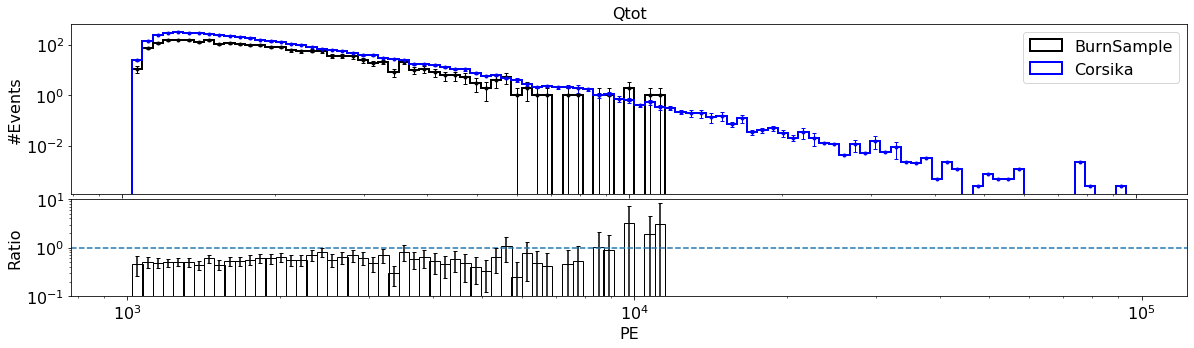

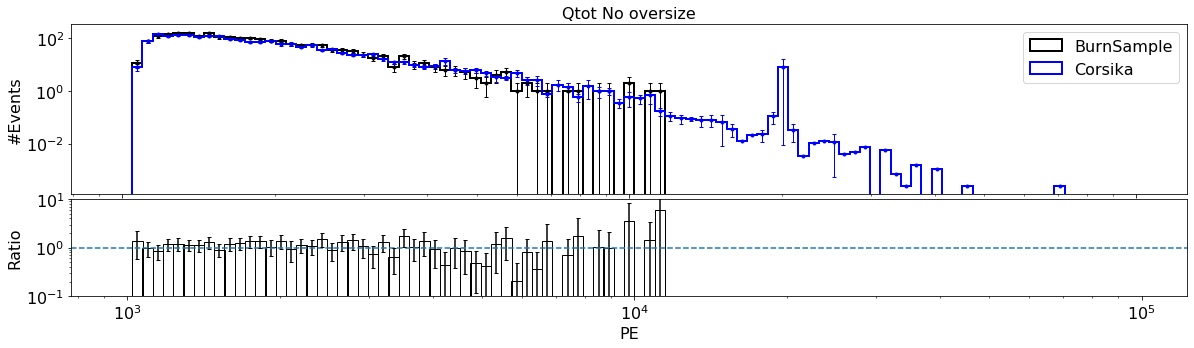

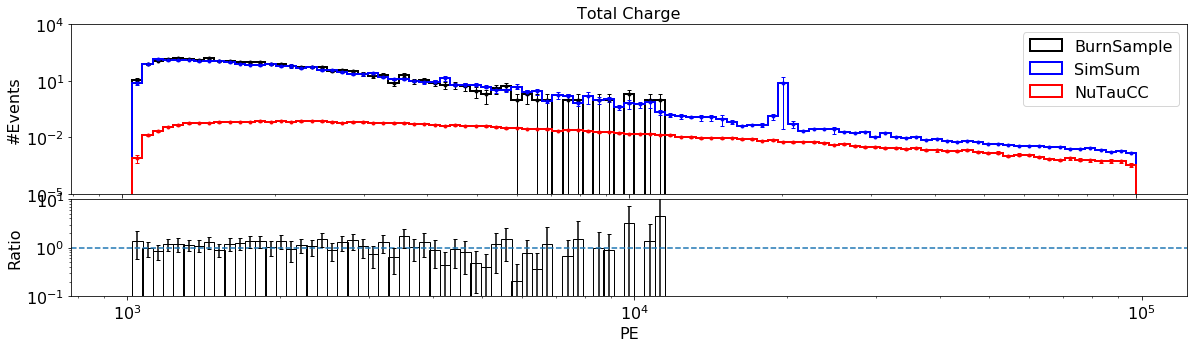

In [467]:
Plot(data_b1['qtot'],data_c1['qtot'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Qtot","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log', use_mask =True)
Plot(data_b1['qtot'],data_c3['qtot'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Qtot No oversize","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log', use_mask =True)
Plot3(array_bs[:,0],array_sim[:,0],array_tc[:,0],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Total Charge","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask =True)

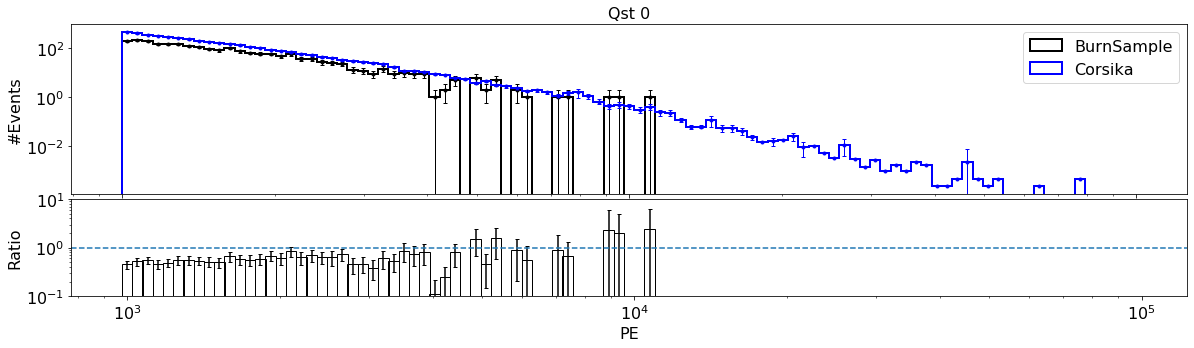

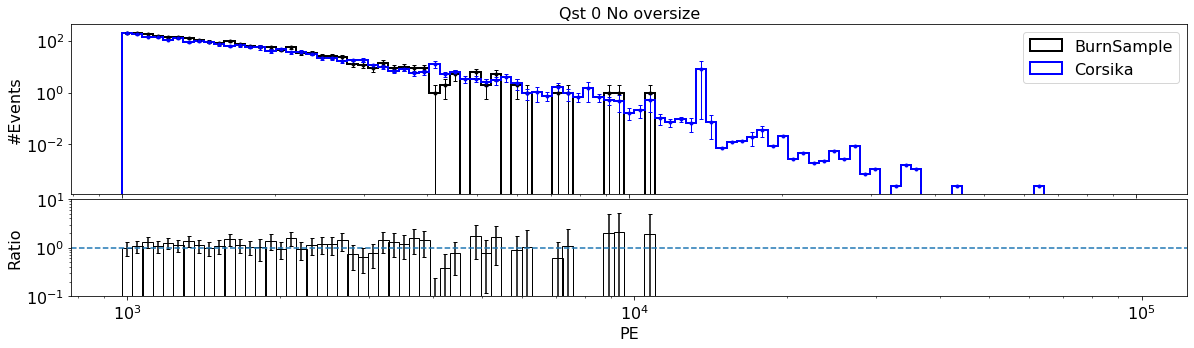

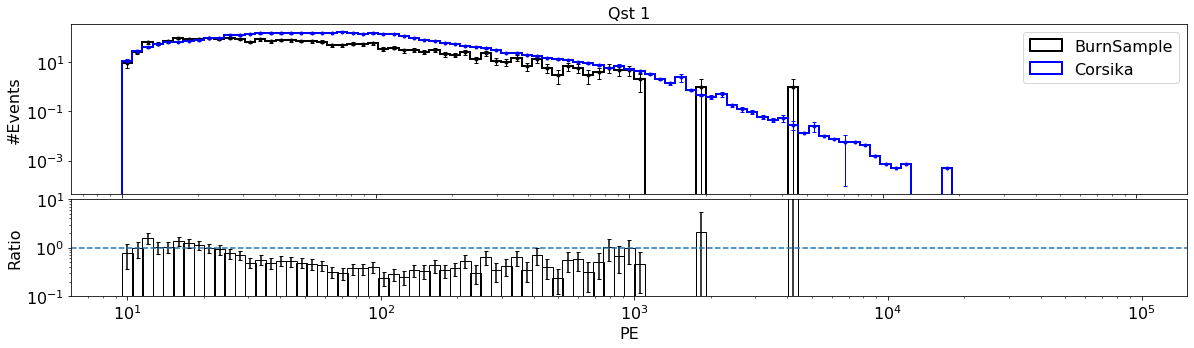

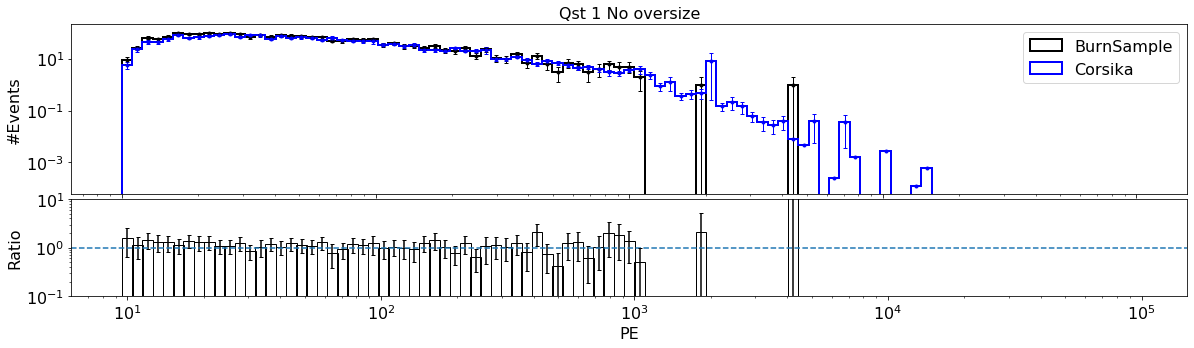

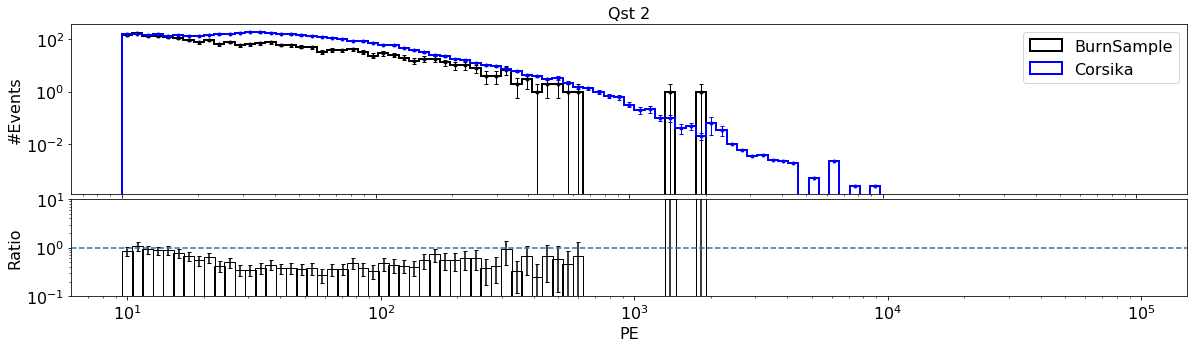

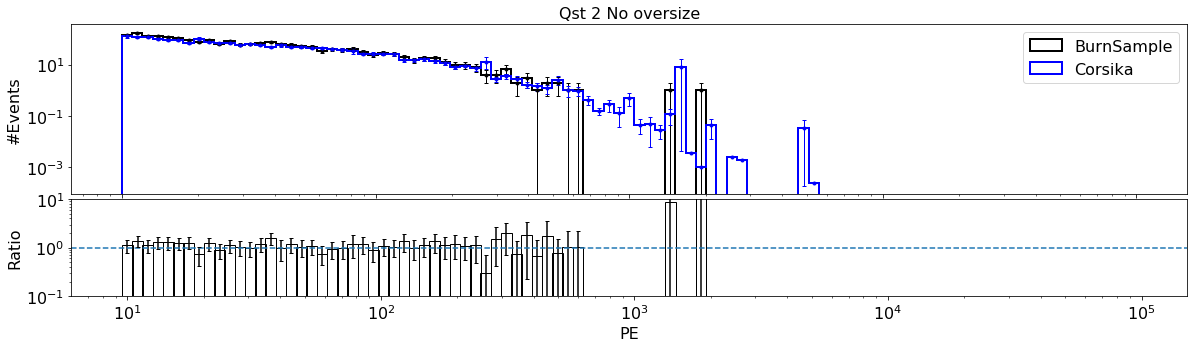

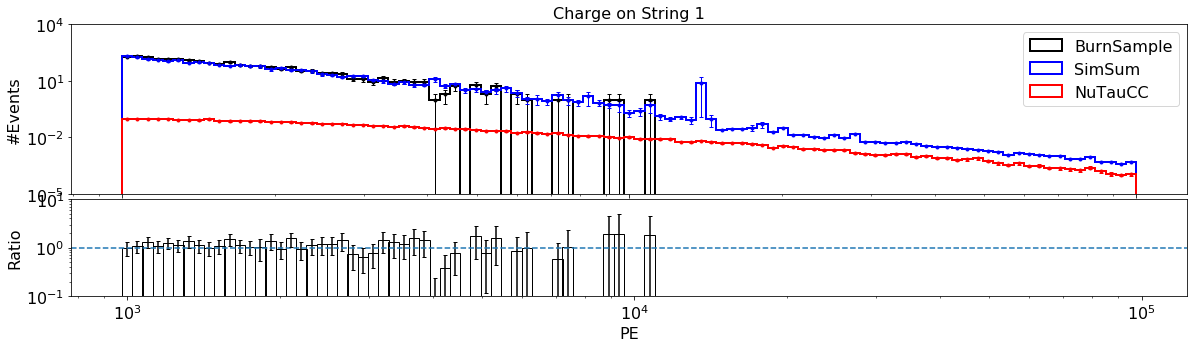

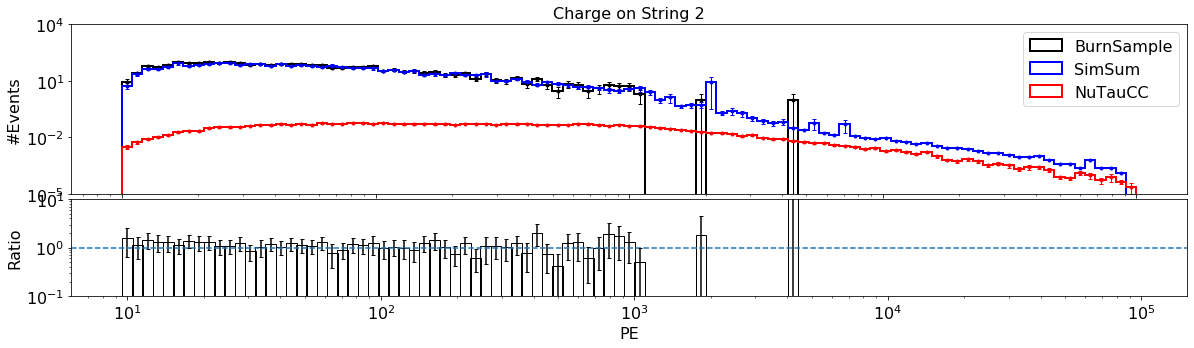

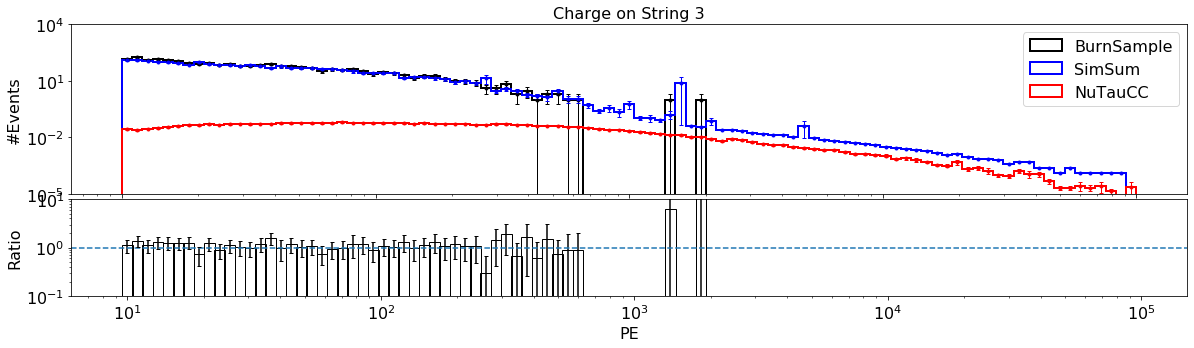

In [468]:
Plot(data_b1['qst']['q'][:,0],data_c1['qst']['q'][:,0],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Qst 0","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log', use_mask =True)
Plot(data_b1['qst']['q'][:,0],data_c3['qst']['q'][:,0],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Qst 0 No oversize","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log', use_mask =True)
Plot(data_b1['qst']['q'][:,1],data_c1['qst']['q'][:,1],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Qst 1","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),scale = 'log', use_mask =True)
Plot(data_b1['qst']['q'][:,1],data_c3['qst']['q'][:,1],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Qst 1 No oversize","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),scale = 'log', use_mask =True)
Plot(data_b1['qst']['q'][:,2],data_c1['qst']['q'][:,2],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Qst 2","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),scale = 'log', use_mask =True)
Plot(data_b1['qst']['q'][:,2],data_c3['qst']['q'][:,2],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Qst 2 No oversize","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),scale = 'log', use_mask =True)
Plot3(array_bs[:,2],array_sim[:,2],array_tc[:,2],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Charge on String 1","PE",bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask =True)
Plot3(array_bs[:,3],array_sim[:,3],array_tc[:,3],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Charge on String 2","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),scale = 'log',use_mask =True)
Plot3(array_bs[:,4],array_sim[:,4],array_tc[:,4],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Charge on String 3","PE",bins=np.logspace(np.log10(10),np.log10(100000),100),scale = 'log',use_mask =True)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in multiply


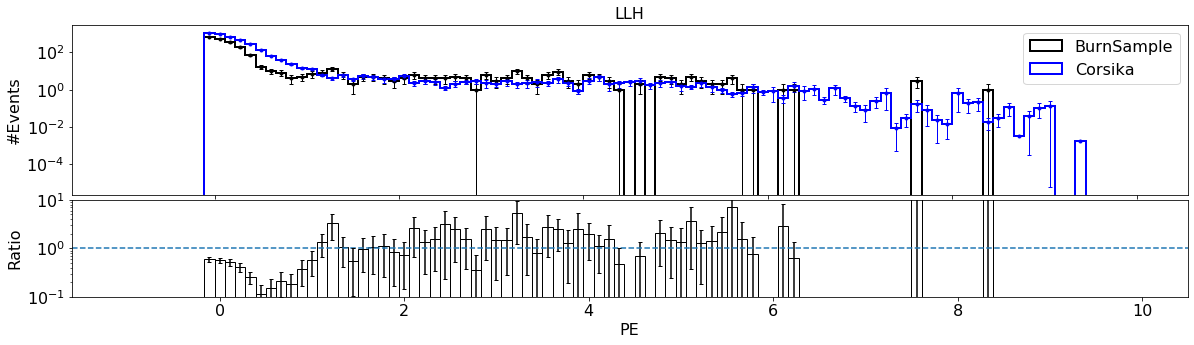

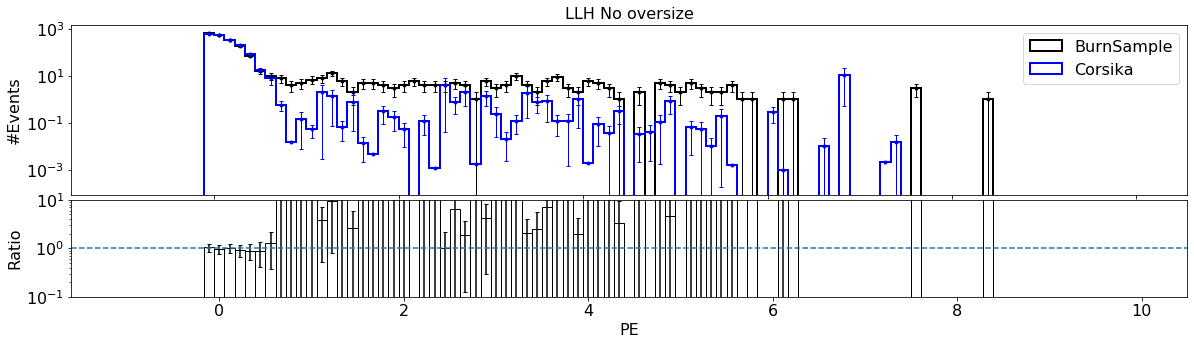

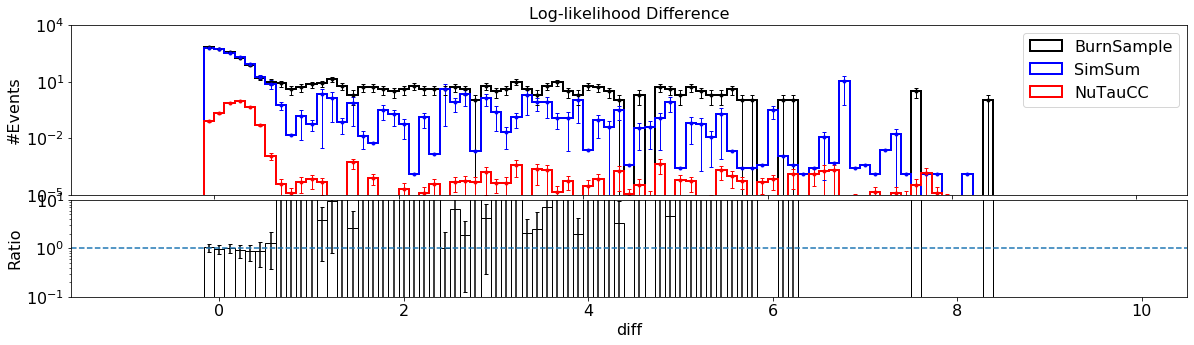

In [469]:
Plot(data_b1['logan_veto']['SPE_rlogl']-data_b1['logan_veto']['Cascade_rlogl'],data_c1['logan_veto']['SPE_rlogl']-data_c1['logan_veto']['Cascade_rlogl'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"LLH","PE",bins=np.linspace(-1,10,100),scale = 'linear',use_mask = True)
Plot(data_b1['logan_veto']['SPE_rlogl']-data_b1['logan_veto']['Cascade_rlogl'],data_c3['logan_veto']['SPE_rlogl']-data_c3['logan_veto']['Cascade_rlogl'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"LLH No oversize","PE",bins=np.linspace(-1,10,100),scale = 'linear',use_mask = True)
Plot3(array_bs[:,1],array_sim[:,1],array_tc[:,1],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Log-likelihood Difference","diff",bins=np.linspace(-1,10,100),scale = 'linear',use_mask = True)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply


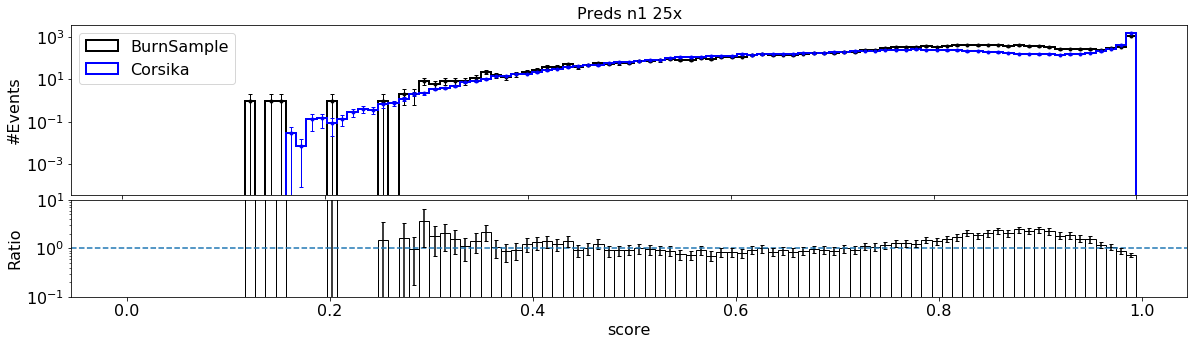

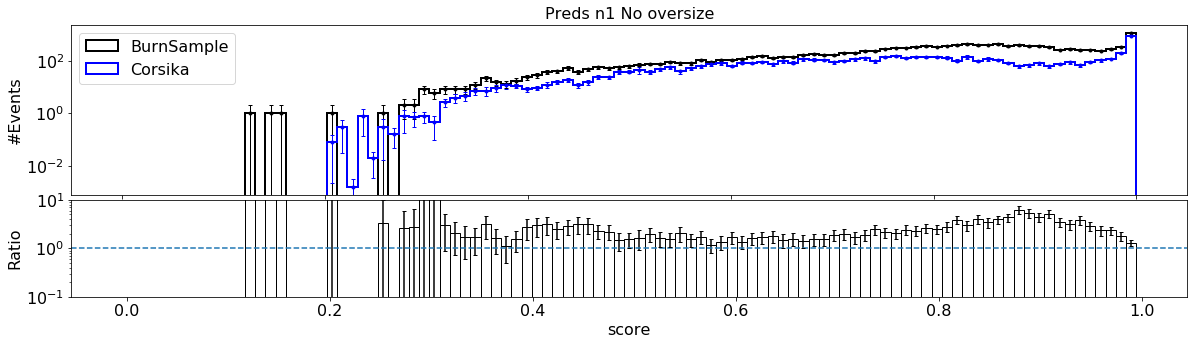

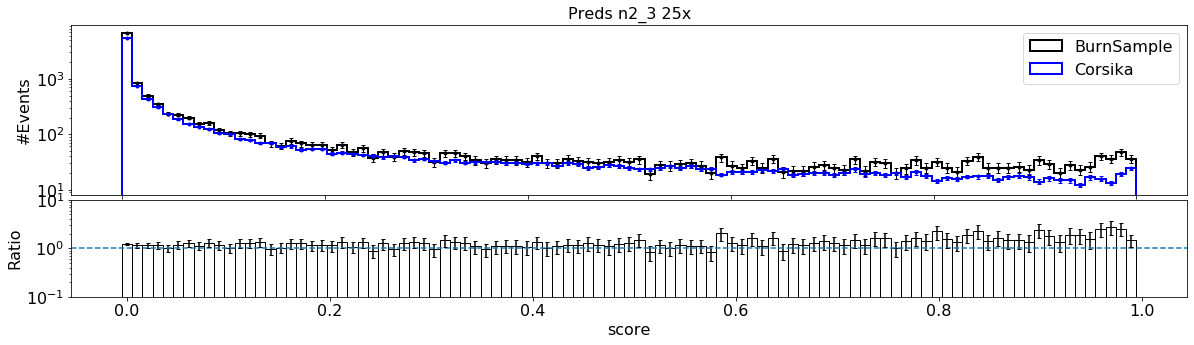

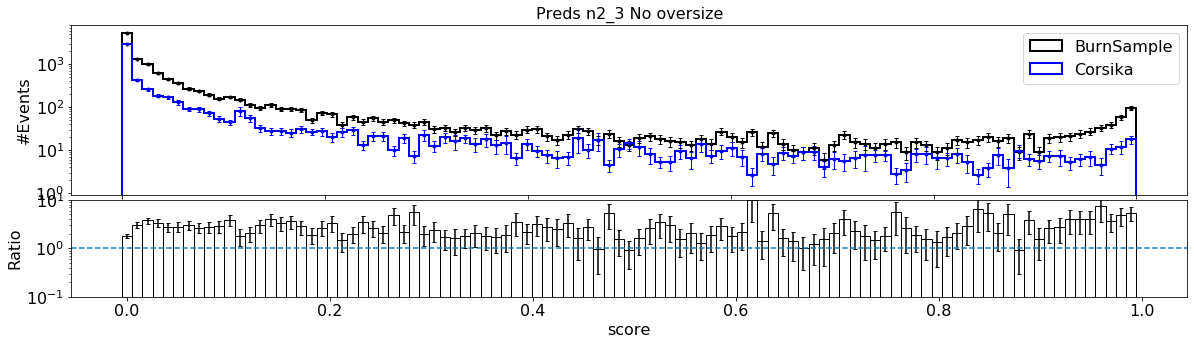

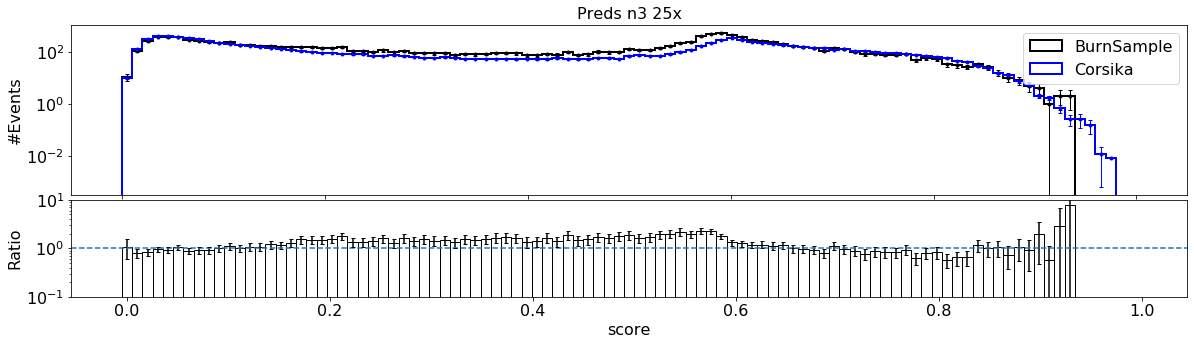

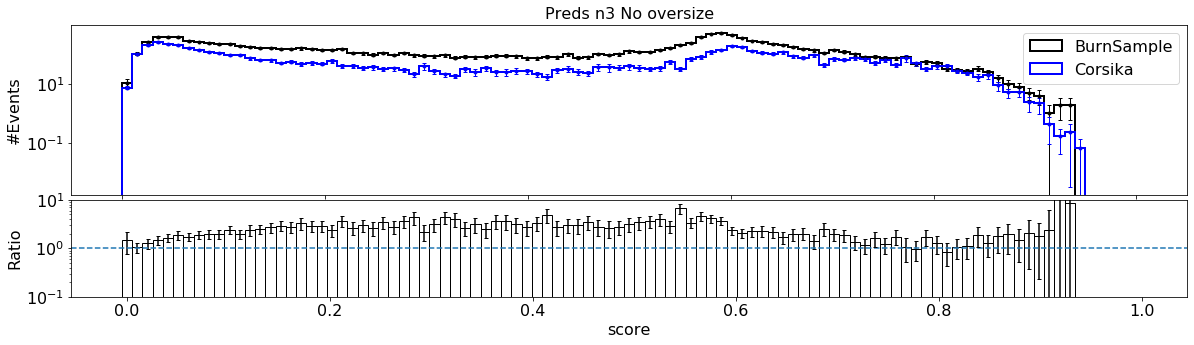

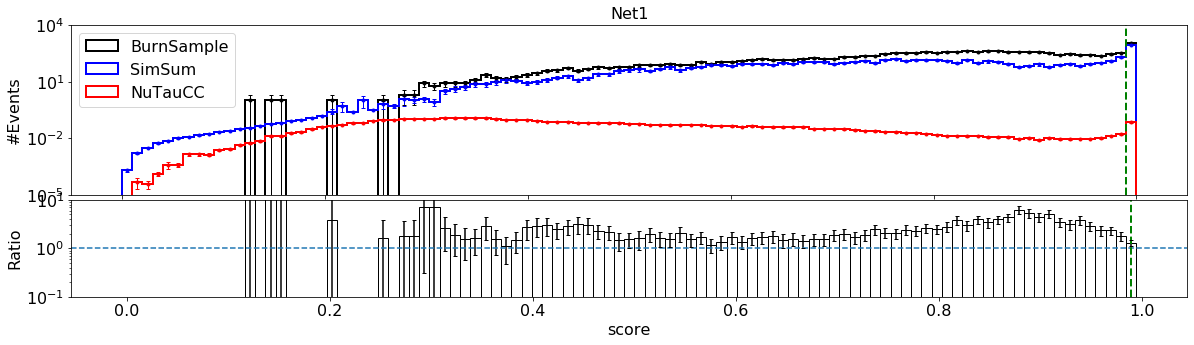

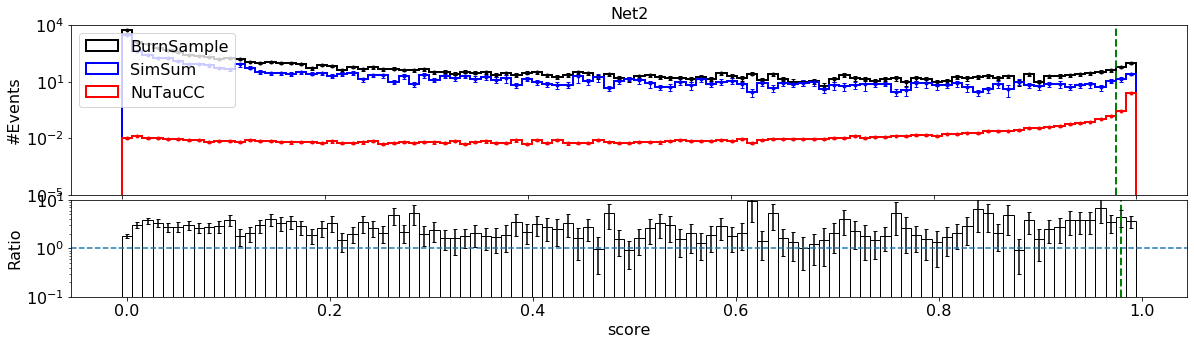

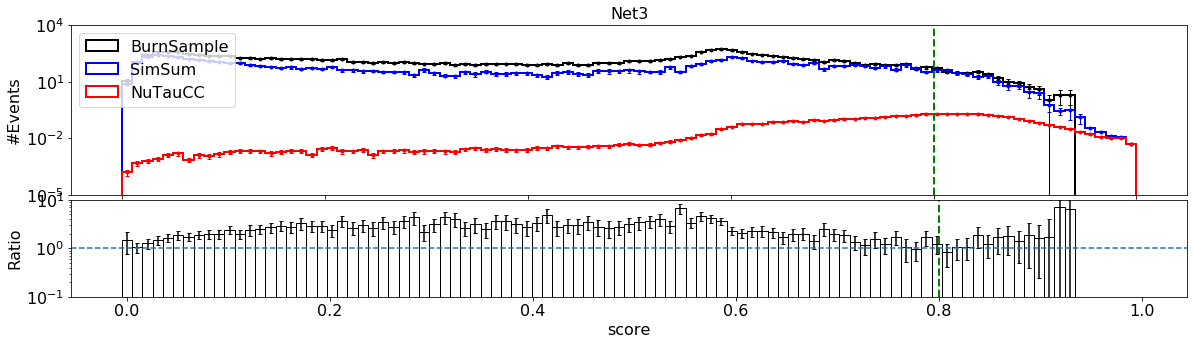

In [477]:
Plot(data_b1['preds']['n1'],data_c1['preds']['n1'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Preds n1 25x","score",bins=np.linspace(0,1,100),scale = 'linear', loc =2, use_mask = False)
Plot(data_b1['preds']['n1'],data_c3['preds']['n1'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Preds n1 No oversize","score",bins=np.linspace(0,1,100),scale = 'linear', loc =2, use_mask = False)
Plot(data_b1['preds']['n2_3'],data_c1['preds']['n2_3'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Preds n2_3 25x","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = False)
Plot(data_b1['preds']['n2_1'],data_c3['preds']['n2_1'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Preds n2_3 No oversize","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = False)
Plot(data_b1['preds']['n3'],data_c1['preds']['n3'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Preds n3 25x","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = False)
Plot(data_b1['preds']['n3'],data_c3['preds']['n3'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Preds n3 No oversize","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = False)
Plot3l(array_bs[:,5],array_sim[:,5],array_tc[:,5],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Net1","score",bins=np.linspace(0,1,100),scale = 'linear', lp =0.99,loc =2, use_mask = False)
Plot3l(array_bs[:,6],array_sim[:,6],array_tc[:,6],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Net2","score",bins=np.linspace(0,1,100),scale = 'linear', lp =0.98,loc =2, use_mask = False)
Plot3l(array_bs[:,7],array_sim[:,7],array_tc[:,7],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Net3","score",bins=np.linspace(0,1,100),scale = 'linear', lp =0.8,loc =2, use_mask = False)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply


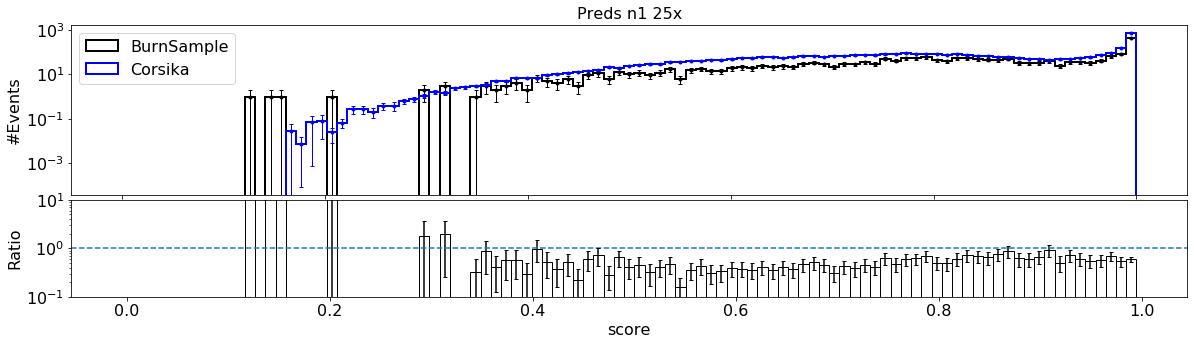

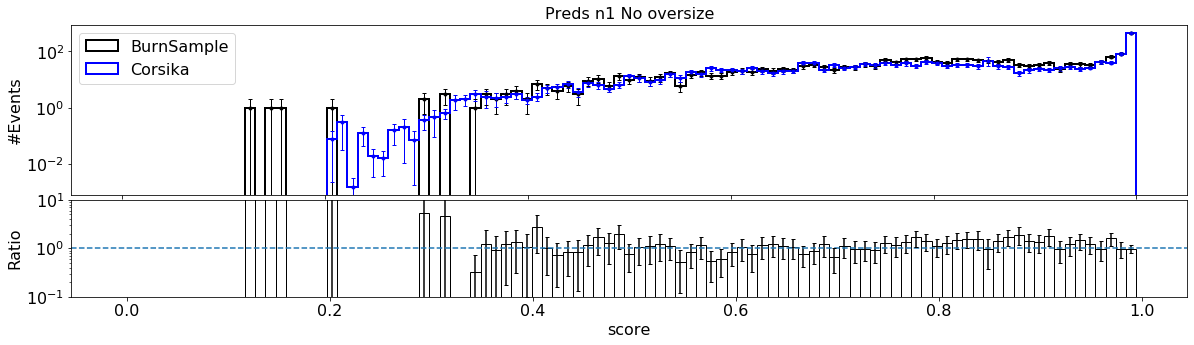

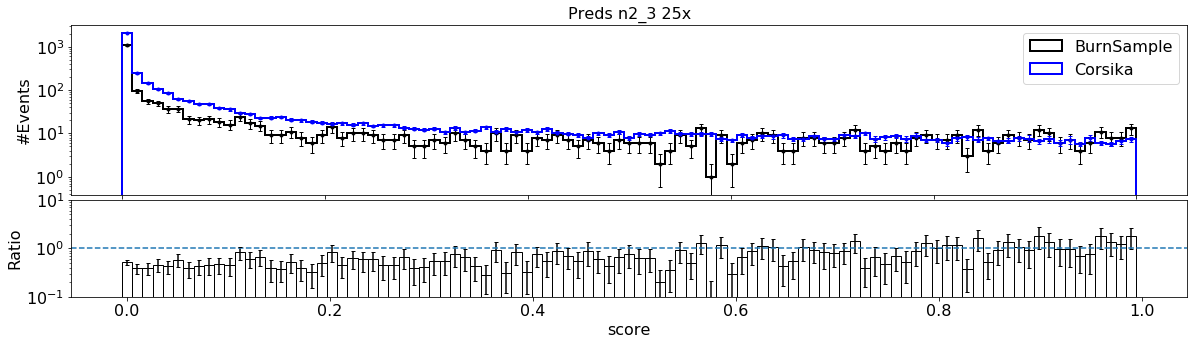

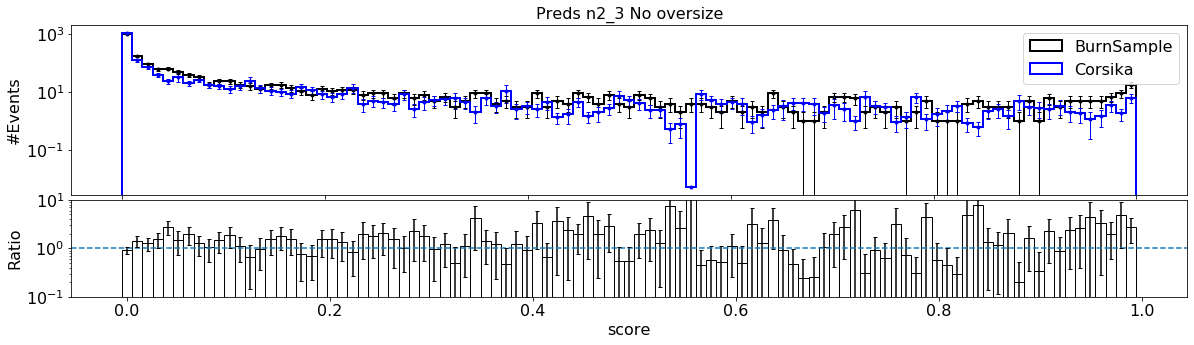

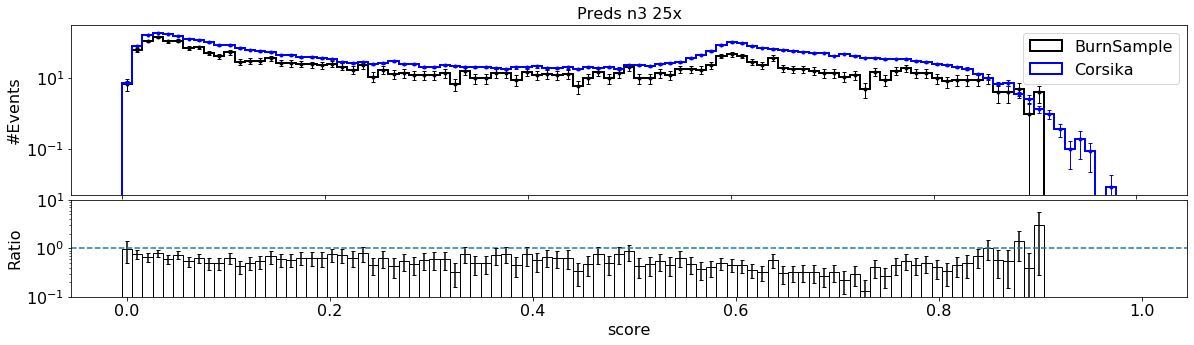

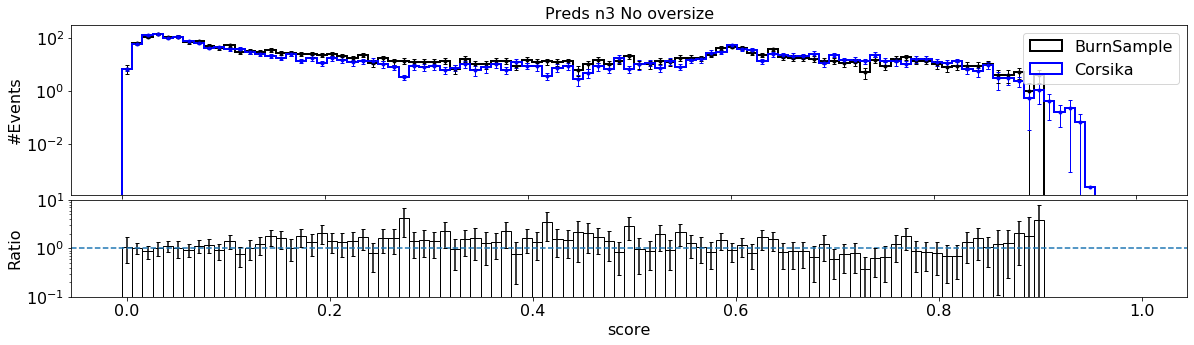

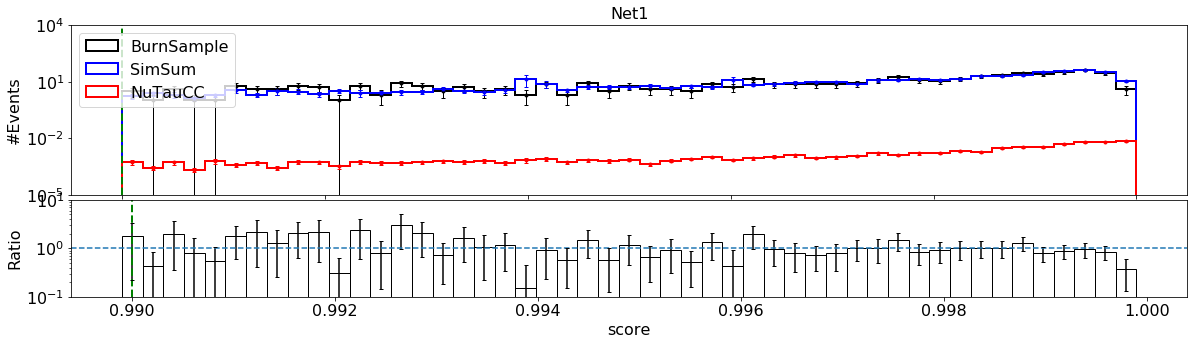

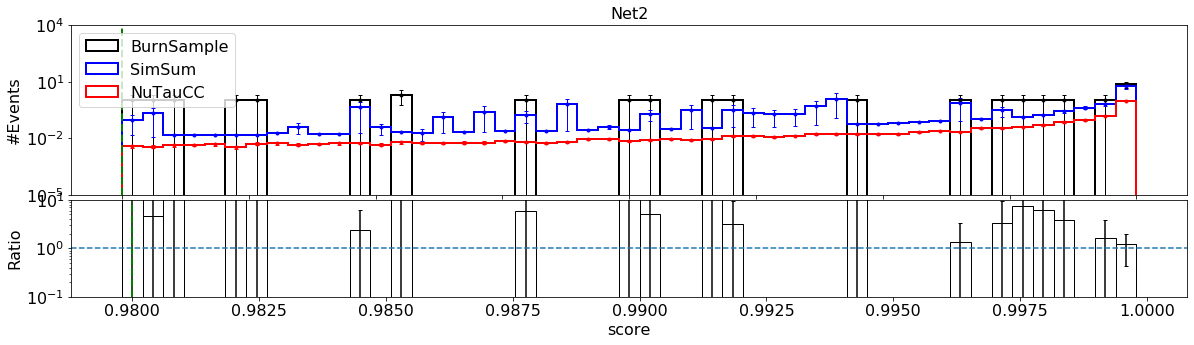

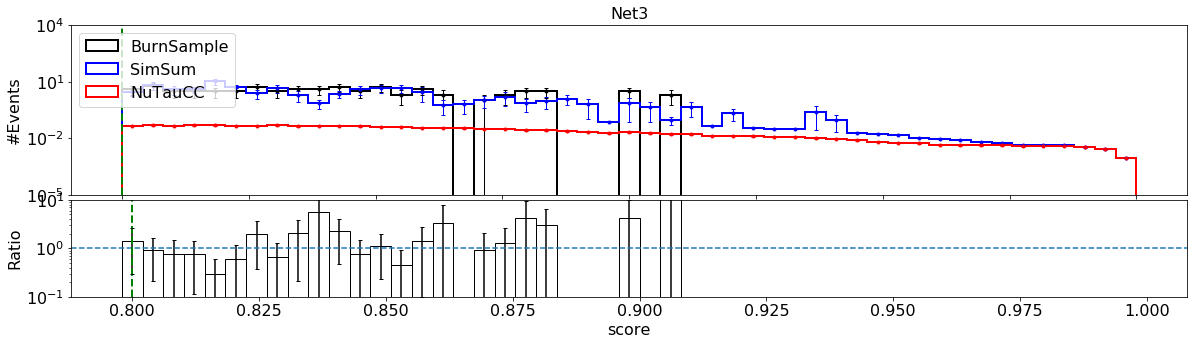

In [480]:
Plot(data_b1['preds']['n1'],data_c1['preds']['n1'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Preds n1 25x","score",bins=np.linspace(0,1,100),scale = 'linear', loc =2, use_mask = True)
Plot(data_b1['preds']['n1'],data_c3['preds']['n1'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Preds n1 No oversize","score",bins=np.linspace(0,1,100),scale = 'linear', loc =2, use_mask = True)
Plot(data_b1['preds']['n2_3'],data_c1['preds']['n2_3'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Preds n2_3 25x","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = True)
Plot(data_b1['preds']['n2_1'],data_c3['preds']['n2_1'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Preds n2_3 No oversize","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = True)
Plot(data_b1['preds']['n3'],data_c1['preds']['n3'],data_c1['weight_val'],maskq_b1,maskq_c1,live_time_b1,"Preds n3 25x","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = True)
Plot(data_b1['preds']['n3'],data_c3['preds']['n3'],data_c3['weight_val'],maskq_b1,maskq_c3,live_time_b1,"Preds n3 No oversize","score",bins=np.linspace(0,1,100),scale = 'linear',use_mask = True)
Plot3l(array_bs[:,5],array_sim[:,5],array_tc[:,5],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Net1","score",bins=np.linspace(0.99,1,50),scale = 'linear', lp =0.99,loc =2, use_mask = True)
Plot3l(array_bs[:,6],array_sim[:,6],array_tc[:,6],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Net2","score",bins=np.linspace(0.98,1,50),scale = 'linear', lp =0.98,loc =2, use_mask = True)
Plot3l(array_bs[:,7],array_sim[:,7],array_tc[:,7],array_sim[:,-1],array_tc[:,-1],maskq_bs,maskq_sim,maskq_tc,live_time_b1,"Net3","score",bins=np.linspace(0.8,1,50),scale = 'linear', lp =0.8,loc =2, use_mask = True)